# Data Analysis Exercise with Laptop Pricing Dataset

## Data Wrangling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Import Dataset
df = pd.read_csv("laptop_pricing_dataset_mod1.csv")
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [7]:
# Drop Unused Column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  234 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       233 non-null    float64
 11  Price           238 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 22.4+ KB


In [12]:
# Find Missing Data
missing_data = df.isnull()

In [14]:
for column in missing_data:
    print(column)
    print(missing_data[column].value_counts())
    print("")

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



In [20]:
df.isnull()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
233,False,False,False,False,False,False,False,False,False,False,False,False
234,False,False,False,False,False,False,False,False,False,False,False,False
235,False,False,False,False,False,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#Replace Missing Value
df.replace('?', np.nan, inplace=True)

In [18]:
df1 = df[df.isna().any(axis=1)]
df1

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
29,HP,3,IPS Panel,3,1,5,35.560,2.5,6,256,NaN,837
38,HP,3,IPS Panel,2,1,5,33.020,2.5,4,256,NaN,888
49,Dell,4,Full HD,2,1,5,33.782,1.6,8,256,NaN,1777
61,Dell,3,Full HD,1,2,7,39.624,2.7,16,256,NaN,1142
68,Dell,3,Full HD,1,2,7,39.624,1.8,8,256,NaN,934
120,Dell,4,Full HD,2,1,5,NaN,1.6,8,256,1.42,2340
151,Dell,5,Full HD,3,1,7,NaN,2.8,8,256,2.06,2240
187,Samsung,4,Full HD,2,1,7,NaN,2.7,8,256,1.31,2031
230,Dell,4,Full HD,2,1,5,NaN,2.5,8,256,1.36,1870


In [21]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [13]:
# Replace continuous data using mean
avg_weight = df['Weight_kg'].mean(axis=0)
df['Weight_kg'].replace(np.nan, avg_weight, inplace=True)

In [31]:
# Replace categorical data with most frequent value
df['Screen_Size_cm'].value_counts()

Screen_Size_cm
39.624    89
35.560    64
38.100    23
33.782    20
33.020    18
43.942     7
43.180     5
31.750     4
30.480     4
Name: count, dtype: int64

In [33]:
df['Screen_Size_cm'].value_counts().idxmax()

39.624

In [15]:
df['Screen_Size_cm'].replace(np.nan, 39.624, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  238 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       238 non-null    float64
 11  Price           238 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 22.4+ KB


In [17]:
# Data standardization
df['Screen_Size_inch'] = df['Screen_Size_cm']/2.54
df['Weight_pounds'] = df['Weight_kg']*2.205
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_inch,Weight_pounds
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978,14.0,3.52800
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634,15.6,4.85100
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946,15.6,4.85100
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244,13.3,2.69010
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837,15.6,4.21155


In [19]:
# Data Normalization by divide the actual value with maximum value
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_inch,Weight_pounds
0,Acer,4,IPS Panel,2,1,5,35.560,0.551724,8,256,1.60,978,14.0,3.52800
1,Dell,3,Full HD,1,1,3,39.624,0.689655,4,256,2.20,634,15.6,4.85100
2,Dell,3,Full HD,1,1,7,39.624,0.931034,8,256,2.20,946,15.6,4.85100
3,Dell,4,IPS Panel,2,1,5,33.782,0.551724,8,128,1.22,1244,13.3,2.69010
4,HP,4,Full HD,2,1,7,39.624,0.620690,8,256,1.91,837,15.6,4.21155


In [21]:
# Binning to create categorical attribute for numerical data
bins = np.linspace(min(df['Price']), max(df['Price']), 4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [23]:
group_names = ['Low', 'Medium', 'High']

In [25]:
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)
df[['Price', 'Price-binned']].head(20)

,Price,Price-binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low
5,1016,Low
6,1117,Low
7,866,Low
8,812,Low
9,1068,Low


In [65]:
df['Price-binned'].value_counts()

Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64

Text(0.5, 1.0, 'Price Bins')

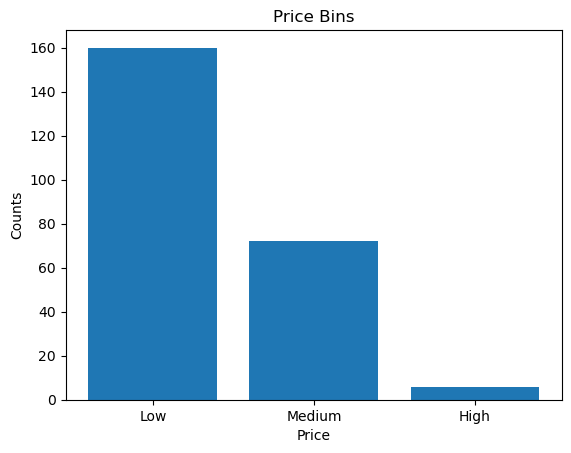

In [71]:
# Make plot from binned data
plt.bar(group_names, df['Price-binned'].value_counts())

plt.xlabel("Price")
plt.ylabel("Counts")
plt.title("Price Bins")

In [27]:
# Indicator variable using get dummies function
dummy_variable = pd.get_dummies(df['Screen'])
dummy_variable.head()

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [29]:
dummy_variable.rename(columns={'Full HD': 'Screen-Full-HD', 'IPS Panel': 'Screen-IPS-Panel'}, inplace=True)
dummy_variable.head()

,Screen-Full-HD,Screen-IPS-Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [31]:
# Concat the data
df = pd.concat([df, dummy_variable], axis=1)

# Drop the Screen Column
df.drop('Screen', axis=1, inplace=True)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_inch,Weight_pounds,Price-binned,Screen-Full-HD,Screen-IPS-Panel
0,Acer,4,2,1,5,35.560,0.551724,8,256,1.60,978,14.0,3.52800,Low,False,True
1,Dell,3,1,1,3,39.624,0.689655,4,256,2.20,634,15.6,4.85100,Low,True,False
2,Dell,3,1,1,7,39.624,0.931034,8,256,2.20,946,15.6,4.85100,Low,True,False
3,Dell,4,2,1,5,33.782,0.551724,8,128,1.22,1244,13.3,2.69010,Low,False,True
4,HP,4,2,1,7,39.624,0.620690,8,256,1.91,837,15.6,4.21155,Low,True,False


## Exploratory Data Analysis

In [103]:
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_inch,Weight_pounds
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,37.309185,0.813822,7.882353,245.781513,1.862232,1462.344538,14.688655,4.106221
std,0.776533,0.638282,0.235790,1.241787,2.961753,0.141860,2.482603,34.765316,0.489090,574.607699,1.166045,1.078442
min,1.000000,1.000000,1.000000,3.000000,30.480000,0.413793,4.000000,128.000000,0.810000,527.000000,12.000000,1.786050
25%,3.000000,2.000000,1.000000,5.000000,35.560000,0.689655,8.000000,256.000000,1.472500,1066.500000,14.000000,3.246863
50%,3.000000,2.000000,1.000000,5.000000,38.100000,0.862069,8.000000,256.000000,1.862232,1333.000000,15.000000,4.106221
75%,4.000000,3.000000,1.000000,7.000000,39.624000,0.931034,8.000000,256.000000,2.200000,1777.000000,15.600000,4.851000
max,5.000000,3.000000,2.000000,7.000000,43.942000,1.000000,16.000000,256.000000,3.600000,3810.000000,17.300000,7.938000


In [107]:
df1 = df._get_numeric_data()
df1.head()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_inch,Weight_pounds,Screen-Full-HD,Screen-IPS-Panel
0,4,2,1,5,35.560,0.551724,8,256,1.60,978,14.0,3.52800,False,True
1,3,1,1,3,39.624,0.689655,4,256,2.20,634,15.6,4.85100,True,False
2,3,1,1,7,39.624,0.931034,8,256,2.20,946,15.6,4.85100,True,False
3,4,2,1,5,33.782,0.551724,8,128,1.22,1244,13.3,2.69010,False,True
4,4,2,1,7,39.624,0.620690,8,256,1.91,837,15.6,4.21155,True,False


In [109]:
df1.corr()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_inch,Weight_pounds,Screen-Full-HD,Screen-IPS-Panel
Category,1.000000,-0.114174,-0.043378,0.232425,-0.285392,-0.053414,0.030127,0.038246,-0.381032,0.286243,-0.285392,-0.381032,-0.117608,0.117608
GPU,-0.114174,1.000000,-0.199549,0.145388,0.154251,0.291439,0.218973,0.094288,0.262853,0.288298,0.154251,0.262853,-0.089582,0.089582
OS,-0.043378,-0.199549,1.000000,0.016954,0.146695,0.050407,-0.074625,0.007751,0.120858,-0.221730,0.146695,0.120858,0.172891,-0.172891
CPU_core,0.232425,0.145388,0.016954,1.000000,0.041092,0.242722,0.473075,0.400015,0.068599,0.459398,0.041092,0.068599,0.003837,-0.003837
Screen_Size_cm,-0.285392,0.154251,0.146695,0.041092,1.000000,-0.000948,0.018194,0.119699,0.797534,-0.110644,1.000000,0.797534,0.342912,-0.342912
CPU_frequency,-0.053414,0.291439,0.050407,0.242722,-0.000948,1.000000,0.226736,0.035557,0.066522,0.366666,-0.000948,0.066522,0.055273,-0.055273
RAM_GB,0.030127,0.218973,-0.074625,0.473075,0.018194,0.226736,1.000000,0.361469,0.055068,0.549297,0.018194,0.055068,0.017913,-0.017913
Storage_GB_SSD,0.038246,0.094288,0.007751,0.400015,0.119699,0.035557,0.361469,1.000000,0.112519,0.243421,0.119699,0.112519,0.061402,-0.061402
Weight_kg,-0.381032,0.262853,0.120858,0.068599,0.797534,0.066522,0.055068,0.112519,1.000000,-0.050312,0.797534,1.000000,0.117909,-0.117909
Price,0.286243,0.288298,-0.221730,0.459398,-0.110644,0.366666,0.549297,0.243421,-0.050312,1.000000,-0.110644,-0.050312,-0.021075,0.021075


### Visualized Data

(0.0, 3974.15)

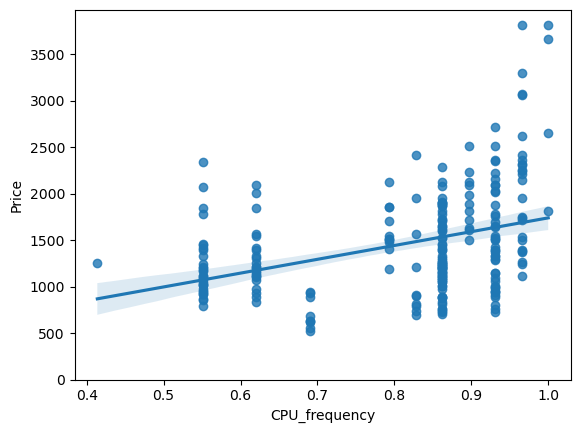

In [116]:
#CPU_frequency
sns.regplot(x='CPU_frequency', y='Price', data=df)
plt.ylim(0,)

(0.0, 3974.15)

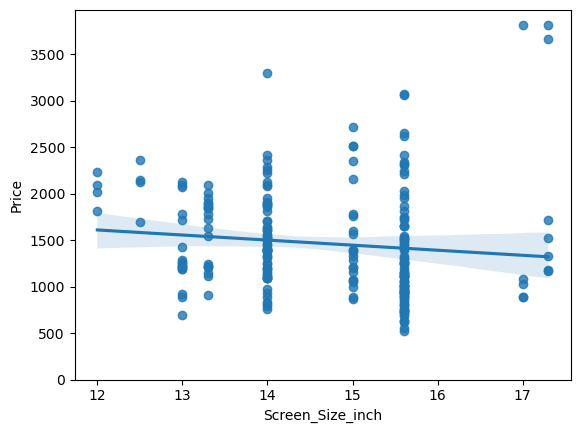

In [118]:
# Screen_size_inch
sns.regplot(x='Screen_Size_inch', y='Price', data=df)
plt.ylim(0,)

(0.0, 3974.15)

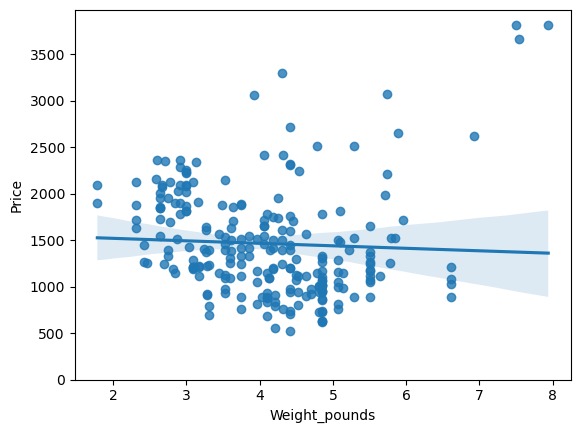

In [120]:
# Weight_pounds
sns.regplot(x='Weight_pounds', y='Price', data=df)
plt.ylim(0,)

/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='GPU', ylabel='Price'>

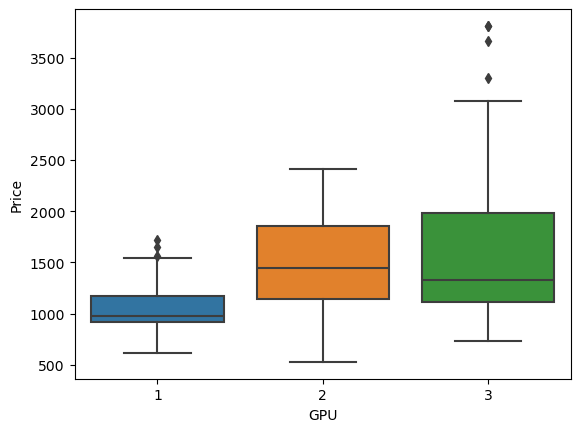

In [128]:
# GPU
sns.boxplot(x='GPU', y='Price', data=df)

/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Category', ylabel='Price'>

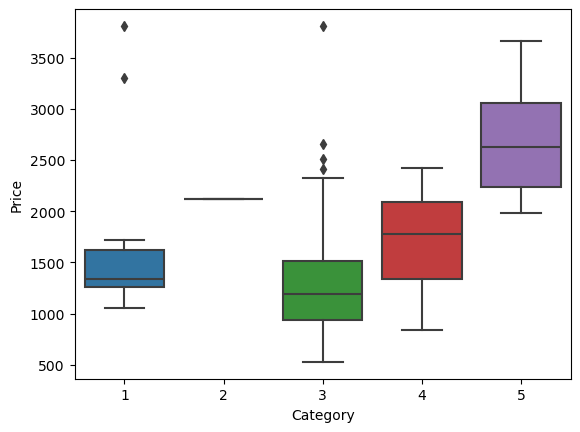

In [130]:
# Category
sns.boxplot(x='Category', y='Price', data=df)

/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='OS', ylabel='Price'>

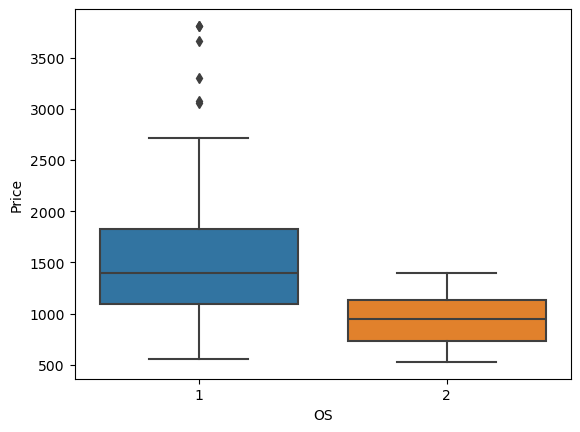

In [132]:
# OS
sns.boxplot(x='OS', y='Price', data=df)

/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='CPU_core', ylabel='Price'>

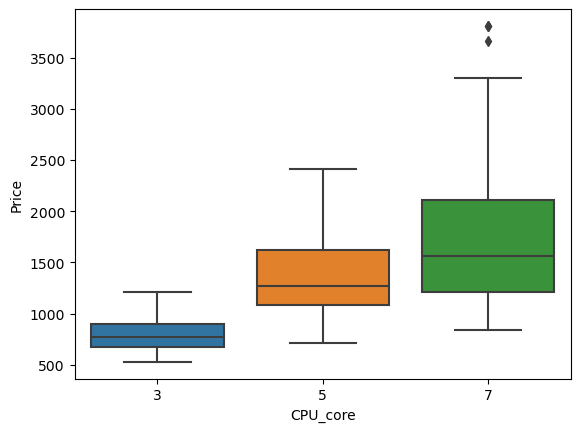

In [134]:
# CPU_core
sns.boxplot(x='CPU_core', y='Price', data=df)

/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='RAM_GB', ylabel='Price'>

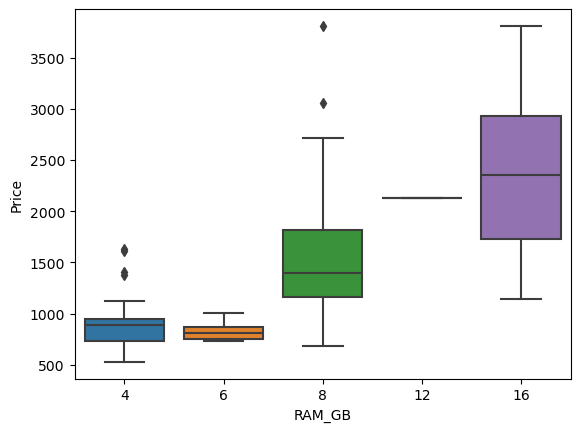

In [136]:
# RAM_GB
sns.boxplot(x='RAM_GB', y='Price', data=df)

/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

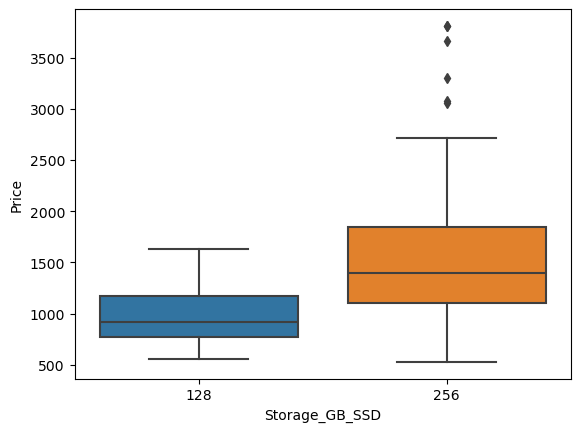

In [140]:
# Storage_GB_SSD
sns.boxplot(x='Storage_GB_SSD', y='Price', data=df)

In [150]:
df.describe(include='all')

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_inch,Weight_pounds,Price-binned,Screen-Full-HD,Screen-IPS-Panel
count,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238,238
unique,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,2
top,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,True,False
freq,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,161,161
mean,NaN,3.205882,2.151261,1.058824,5.630252,37.309185,0.813822,7.882353,245.781513,1.862232,1462.344538,14.688655,4.106221,NaN,NaN,NaN
std,NaN,0.776533,0.638282,0.235790,1.241787,2.961753,0.141860,2.482603,34.765316,0.489090,574.607699,1.166045,1.078442,NaN,NaN,NaN
min,NaN,1.000000,1.000000,1.000000,3.000000,30.480000,0.413793,4.000000,128.000000,0.810000,527.000000,12.000000,1.786050,NaN,NaN,NaN
25%,NaN,3.000000,2.000000,1.000000,5.000000,35.560000,0.689655,8.000000,256.000000,1.472500,1066.500000,14.000000,3.246863,NaN,NaN,NaN
50%,NaN,3.000000,2.000000,1.000000,5.000000,38.100000,0.862069,8.000000,256.000000,1.862232,1333.000000,15.000000,4.106221,NaN,NaN,NaN
75%,NaN,4.000000,3.000000,1.000000,7.000000,39.624000,0.931034,8.000000,256.000000,2.200000,1777.000000,15.600000,4.851000,NaN,NaN,NaN


In [171]:
# Group By
df_group = df[['GPU', 'CPU_core', 'Price']]
df_group = df_group.groupby(['GPU', 'CPU_core'], as_index=False).mean()
df_group.head()

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674


In [173]:
group_pivot = df_group.pivot(index='GPU', columns='CPU_core')
group_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

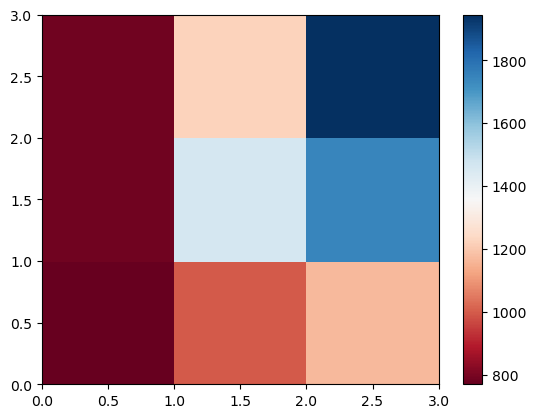

In [176]:
plt.pcolor(group_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [179]:
from scipy import stats

In [182]:
df.columns

Index(['Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm',
       'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_kg', 'Price',
       'Screen_Size_inch', 'Weight_pounds', 'Price-binned', 'Screen-Full-HD',
       'Screen-IPS-Panel'],
      dtype='object')

In [187]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857842  with a P-value of P = 3.6815606288429613e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.3666655589258859  with a P-value of P = 5.502463350713551e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.2434207552181029  with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118284  with a P-value of P = 0.08853397846830666
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.050312258377515434  with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827381  with a P-value of P = 0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881428  

## Model Development

In [33]:
from sklearn.linear_model import LinearRegression

In [192]:
df.columns

Index(['Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm',
       'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_kg', 'Price',
       'Screen_Size_inch', 'Weight_pounds', 'Price-binned', 'Screen-Full-HD',
       'Screen-IPS-Panel'],
      dtype='object')

In [35]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [200]:
# Linear regression
lr= LinearRegression()
lr

LinearRegression()

In [202]:
# Input the data
x=df[['CPU_frequency']]
y=df['Price']

In [243]:
lr.fit(x, y)
lr

LinearRegression()

In [245]:
yhat = lr.predict(x)
yhat[0:5]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057])

In [208]:
lr.intercept_

253.66117068582116

In [210]:
lr.coef_

array([1485.19362648])

In [226]:
mse_lr = mean_squared_error(y, yhat)
r2_lr = lr.score(x, y)
print("The mean squared error are:", mse_lr)
print("The r2 score are:", r2_lr)

The mean squared error are: 284583.4405868629
The r2 score are: 0.1344436321024326


/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

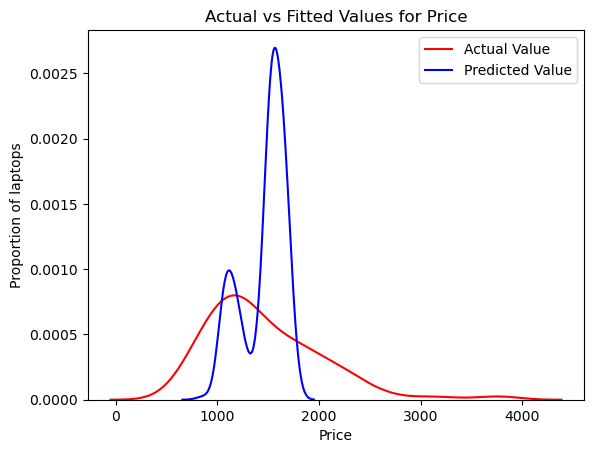

In [249]:
# Distribution plot of fitted and actual value
ax1 = sns.distplot(y, hist=False, color='r', label = "Actual Value")
sns.distplot(yhat, hist=False, color='b', label="Fitted Value", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [228]:
# Multiple linear Regression
z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]

In [251]:
lr.fit(z, y)

LinearRegression()

In [216]:
lr.intercept_

-841.9913259091234

In [218]:
lr.coef_

array([ 9.61283977e+02,  8.68089292e+01,  3.94604825e-01,  6.56633979e+01,
       -4.27445318e+02,  9.78000871e+01,  1.91295466e+02])

In [253]:
yhat = lr.predict(z)

In [236]:
mse_mlr = mean_squared_error(y, yhat)
r2_score_mlr = lr.score(z, y)
print("The mean squared error:", mse_mlr)
print("The r2 score are:", r2_score_mlr)

The mean squared error: 161680.5726389311
The r2 score are: 0.5082509055187374


/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

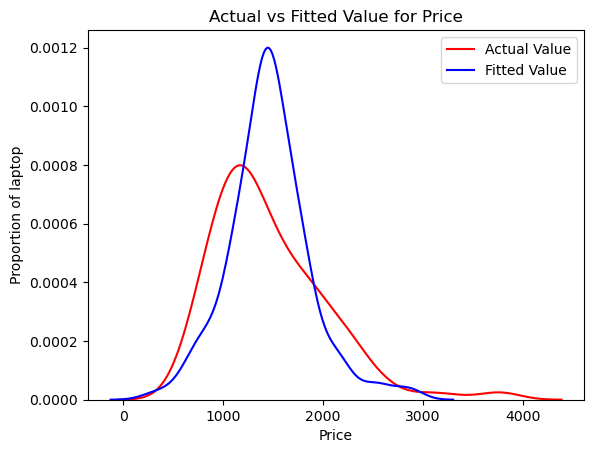

In [255]:
# Distribution plot of fitted and actual value
ax1 = sns.distplot(y, hist=False, color='r', label="Actual Value")
sns.distplot(yhat, hist=False, color='b', label="Fitted Value")

plt.title("Actual vs Fitted Value for Price")
plt.xlabel("Price")
plt.ylabel("Proportion of laptop")
plt.legend(["Actual Value", "Fitted Value"])
plt.show()

In [238]:
# Polynomial Features
pr = PolynomialFeatures()

In [261]:
x=df['CPU_frequency']
f=np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3             2
3.409e+04 x - 6.574e+04 x + 4.129e+04 x - 7238


In [270]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

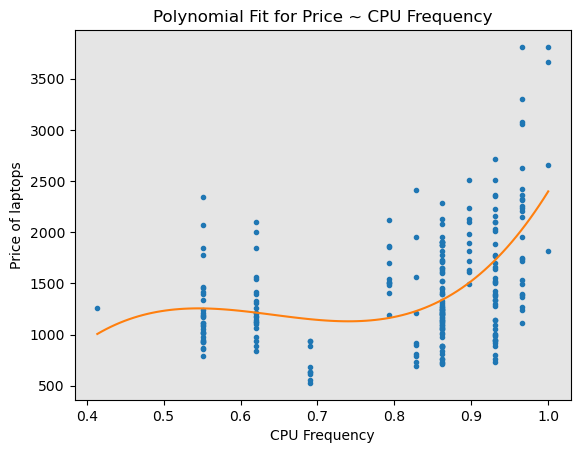

In [272]:
PlotPolly(p, x, y, 'CPU Frequency')

In [275]:
f1 = np.polyfit(x, y, 1)
p1 = np.poly1d(f1)

f5 = np.polyfit(x, y, 5)
p5 = np.poly1d(f5)

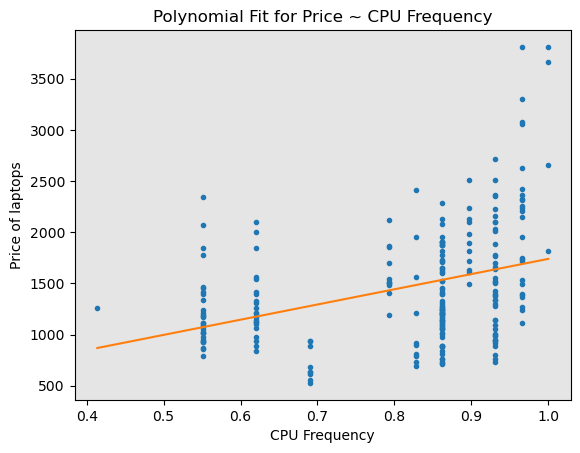

In [277]:
PlotPolly(p1, x, y, 'CPU Frequency')

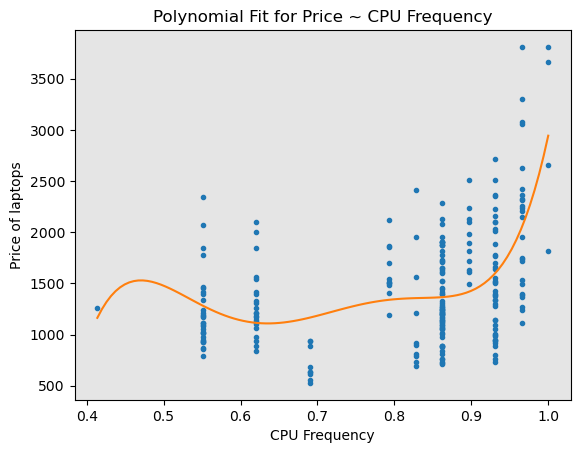

In [279]:
PlotPolly(p5, x, y, 'CPU Frequency')

In [281]:
r2_squared = r2_score(y, p1(x))
mse_p1 = mean_squared_error(y, p1(x))
print("The r2 score is:", r2_squared)
print("The mse is:", mse_p1)

The r2 score is: 0.1344436321024326
The mse is: 284583.4405868629


In [289]:
input = [('scale' , StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [292]:
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [295]:
pipe.fit(z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [298]:
yhat = pipe.predict(z)
yhat[0:5]

array([1493.25   ,  762.15625, 1262.5625 , 1072.34375, 1501.34375])

In [301]:
mse_pipe = mean_squared_error(y, yhat)
r2_pipe = r2_score(y, yhat)
print("The mse is:", mse_pipe)
print("The r2 score:", r2_pipe)

The mse is: 121032.62501641281
The r2 score: 0.631881043077281


## Model Evaluation

In [40]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [47]:
from sklearn.linear_model import Ridge

In [53]:
# Divide data
y_data = df['Price']
x_data = df.drop('Price', axis=1)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.10, random_state=1)
print("the test sample:", x_test.shape[0])
print("the train sample:", x_train.shape[0])

the test sample: 24
the train sample: 214


In [59]:
lr=LinearRegression()
lr.fit(x_train[['CPU_frequency']], y_train)
print(lr.score(x_test[['CPU_frequency']], y_test))
print(lr.score(x_train[['CPU_frequency']], y_train))

-0.06599437350393766
0.14829792099817962


Cross Validation

In [66]:
Rcross = cross_val_score(lr, x_data[['CPU_frequency']], y_data, cv=4)
print("the mean of r2 score are:", Rcross.mean(), "and the standard deviation is:", Rcross.std())

the mean of r2 score are: -0.16109232388595096 and the standard deviation is: 0.3849579786664708


In [68]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.50, random_state=1)
print("the test sample is:", x_train1.shape[0])
print("the train sample is:", x_test1.shape[0])

the test sample is: 119
the train sample is: 119


In [73]:
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

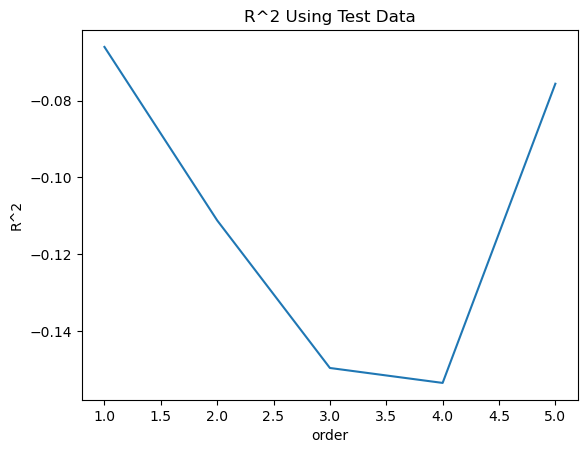

In [75]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Ridge Regression

In [78]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [84]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:02<00:00, 352.02it/s, Test Score=0.371, Train Score=0.634]


In [82]:
from tqdm import tqdm

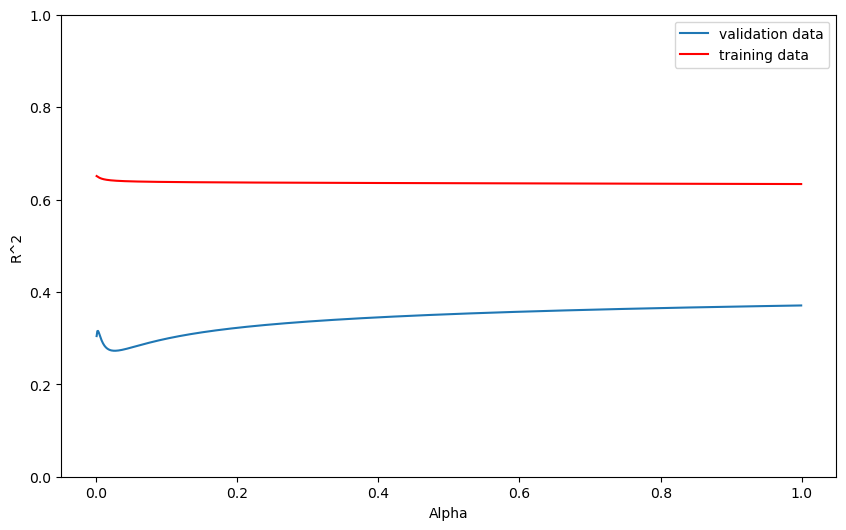

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(Alpha, Rsqu_test, label= 'validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training data')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [90]:
parameters= [{'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10]}]

In [92]:
RR = Ridge()
RR

Ridge()

In [95]:
Grid1 = GridSearchCV(RR, parameters, cv=4)
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [101]:
Bestrr = Grid1.best_estimator_
print(Bestrr.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_test))

0.2447803981790706
